# Chap 05

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import math

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pystan

### 対数変換

In [3]:
df = pd.read_csv('./input/data-rental.txt')
df.head()

,Y,Area
0,263.062,40.66
1,519.000,61.94
2,671.400,55.13
3,473.030,56.82
4,455.600,56.82


[]

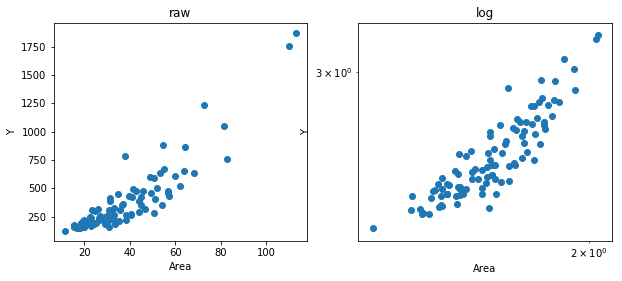

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x=df['Area'].values, y=df['Y'].values)
ax[0].set_xlabel('Area')
ax[0].set_ylabel('Y')
ax[0].set_title('raw')

ax[1].scatter(x=np.log10(df['Area'].values), y=np.log10(df['Y'].values))
ax[1].set_xlabel('Area')
ax[1].set_ylabel('Y')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_title('log')
plt.plot()

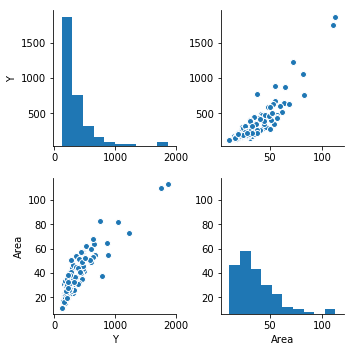

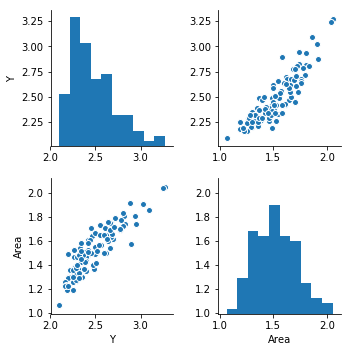

In [96]:
sns.pairplot(df)
df_log = df.copy()
df_log['Y'] = np.log10(df_log['Y'].values)
df_log['Area'] = np.log10(df_log['Area'].values)
sns.pairplot(df_log)

In [5]:
model_raw = pystan.StanModel(file='./model/model7-1.stan')
model_log = pystan.StanModel(file='./model/model7-2.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce82e06edaef283637d8dd73e97e197d NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce82e06edaef283637d8dd73e97e197d NOW.


In [6]:
N_new = 50
Area_new = np.linspace(10, 120, 50)
stan_data = {
    'Area': df['Area'].values,
    'Y': df['Y'].values,
    'N': df.shape[0],
    'Area_new': Area_new,
    'N_new': N_new,
}
fit_raw = model_raw.sampling(data=stan_data, seed=1234)

stan_data = {
    'Area': np.log10(df['Area'].values),
    'Y': np.log10(df['Y'].values),
    'N': df.shape[0],
    'Area_new': np.log10(Area_new),
    'N_new': N_new,
}
fit_log = model_log.sampling(data=stan_data, seed=1234)

In [7]:
fit_raw

Inference for Stan model: anon_model_ce82e06edaef283637d8dd73e97e197d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b1         -147.9     0.7  28.93 -203.5 -167.3 -148.9 -128.9 -89.78   1716    1.0
b2          13.99    0.02    0.7  12.57  13.52   14.0  14.45  15.34   1744    1.0
s_Y        131.15    0.21    9.6 113.44  124.6 130.52 137.48 151.52   2129    1.0
mu[0]      420.87    0.22  13.61 394.27 411.73 421.23 430.09 447.09   4000    1.0
mu[1]      718.58    0.41  22.11 675.71 703.65 718.39 733.46 762.39   2843    1.0
mu[2]      623.31    0.32  18.53 587.54 610.94 623.07 635.89 659.66   3344    1.0
mu[3]      646.95    0.34  19.37 609.85 633.94 646.67 660.08 685.07   3193    1.0
mu[4]      646.95    0.34  19.37 609.85 633.94 646.67 660.08 685.07   3193    1.0
mu[5]       68.87    0.46  19.94  29.81  55.56  68.46  82.21  108.4   191

In [8]:
fit_log

Inference for Stan model: anon_model_ce82e06edaef283637d8dd73e97e197d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b1           0.81  3.0e-3   0.09   0.64   0.75   0.81   0.87   0.98    894    1.0
b2            1.1  1.9e-3   0.06   0.98   1.06    1.1   1.14   1.21    888    1.0
s_Y          0.11  2.0e-4 8.1e-3    0.1   0.11   0.11   0.12   0.13   1654    1.0
mu[0]        2.58  2.4e-4   0.01   2.56   2.57   2.58   2.59    2.6   2714    1.0
mu[1]        2.78  5.6e-4   0.02   2.74   2.77   2.78   2.79   2.82   1219    1.0
mu[2]        2.73  4.7e-4   0.02   2.69   2.72   2.73   2.74   2.76   1357    1.0
mu[3]        2.74  4.9e-4   0.02   2.71   2.73   2.74   2.75   2.78   1314    1.0
mu[4]        2.74  4.9e-4   0.02   2.71   2.73   2.74   2.75   2.78   1314    1.0
mu[5]        2.12  6.7e-4   0.02   2.08   2.11   2.12   2.13   2.16   107

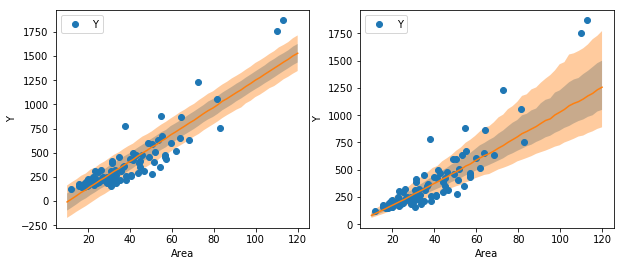

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

y_new = fit_raw.extract()['y_new'].T
ax[0].plot(df['Area'].values, df['Y'], 'o')
ax[0].plot(Area_new, y_new.mean(axis=1))
ax[0].fill_between(Area_new, np.percentile(y_new, 25.0, axis=1), np.percentile(y_new, 75.0, axis=1), alpha=0.4)
ax[0].fill_between(Area_new, np.percentile(y_new, 10.0, axis=1), np.percentile(y_new, 90.0, axis=1), alpha=0.4)
# ax_.xlim(40, 200)
# ax_.ylim(0.0, 0.6)
ax[0].set_xlabel('Area')
ax[0].set_ylabel('Y')
ax[0].legend()

y_new = fit_log.extract()['y_new'].T
ax[1].plot(df['Area'].values, df['Y'], 'o')
ax[1].plot(Area_new, 10 ** y_new.mean(axis=1))
ax[1].fill_between(Area_new, 10 ** np.percentile(y_new, 25.0, axis=1), 10 ** np.percentile(y_new, 75.0, axis=1), alpha=0.4)
ax[1].fill_between(Area_new, 10 ** np.percentile(y_new, 10.0, axis=1), 10 ** np.percentile(y_new, 90.0, axis=1), alpha=0.4)
# ax_.xlim(40, 200)
# ax_.ylim(0.0, 0.6)
ax[1].set_xlabel('Area')
ax[1].set_ylabel('Y')
ax[1].legend()

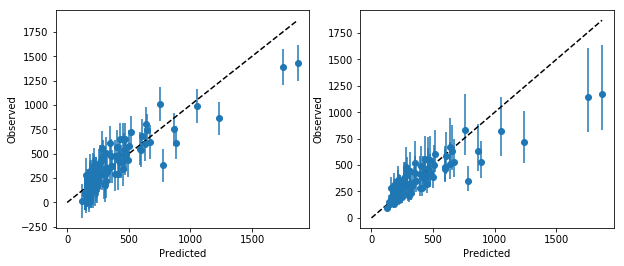

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

y_pred = fit_raw.extract()['y_pred'].T
err_u = np.median(y_pred, axis=1) - np.percentile(y_pred, 10.0, axis=1)
err_d = np.percentile(y_pred, 90.0, axis=1) - np.median(y_pred, axis=1)
err = np.vstack([err_u, err_d])

ax[0].errorbar(df['Y'].values, np.median(y_pred, axis=1), yerr=err, fmt="o")
ax[0].plot([0, df['Y'].max()], [0, df['Y'].max()], "k--")
# ax[0].xlim(0.0, 0.5)
# ax[0].ylim(0.0, 0.5)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Observed')
ax[0].legend()

y_pred = 10 ** fit_log.extract()['y_pred'].T
err_u = np.median(y_pred, axis=1) - np.percentile(y_pred, 10.0, axis=1)
err_d = np.percentile(y_pred, 90.0, axis=1) - np.median(y_pred, axis=1)
err = np.vstack([err_u, err_d])

ax[1].errorbar(df['Y'].values, np.median(y_pred, axis=1), yerr=err, fmt="o")
ax[1].plot([0, df['Y'].max()], [0, df['Y'].max()], "k--")
# ax[0].xlim(0.0, 0.5)
# ax[0].ylim(0.0, 0.5)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Observed')
ax[1].legend()

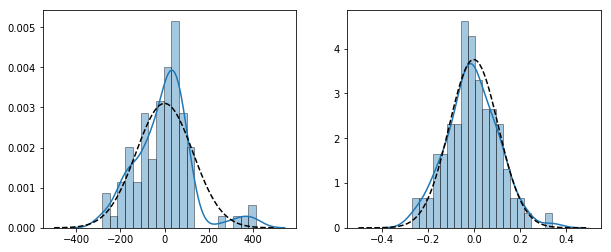

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

epc = (df['Y'].values - fit_raw.extract()['mu']).T
epc_map = []
for i in range(epc.shape[0]):
    epc_hist = np.histogram(epc[i])
    epc_map.append(epc_hist[1][np.argmax(epc_hist[0])])
sigma = fit_raw.extract()['s_Y'].T
sigma_hist = np.histogram(sigma)
sigma_map = sigma_hist[1][np.argmax(sigma_hist[0])]
sns.distplot(epc_map, bins=20, hist_kws=dict(edgecolor="k", linewidth=1), ax=ax[0])
ax[0].plot(np.linspace(-500, 500, 100), stats.norm.pdf(np.linspace(-500, 500, 100), loc=0, scale=sigma_map), 'k--')

epc = (np.log10(df['Y'].values) - fit_log.extract()['mu']).T
epc_map = []
for i in range(epc.shape[0]):
    epc_hist = np.histogram(epc[i])
    epc_map.append(epc_hist[1][np.argmax(epc_hist[0])])
sigma = fit_log.extract()['s_Y'].T
sigma_hist = np.histogram(sigma)
sigma_map = sigma_hist[1][np.argmax(sigma_hist[0])]
sns.distplot(epc_map, bins=20, hist_kws=dict(edgecolor="k", linewidth=1), ax=ax[1])
ax[1].plot(np.linspace(-0.5, 0.5, 100), stats.norm.pdf(np.linspace(-0.5, 0.5, 100), loc=0, scale=sigma_map), 'k--')

### 非線形

In [184]:
df = pd.read_csv('./input/data-aircon.txt')
df.head()

,X,Y
0,-2.1,98.2
1,-1.9,109.3
2,-1.3,95.4
3,-1.4,93.5
4,-1.3,95.5


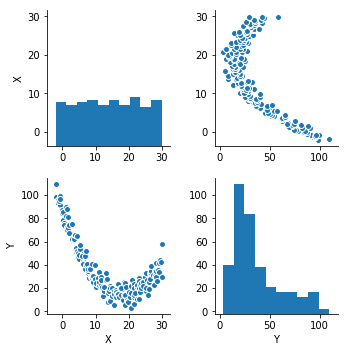

In [185]:
sns.pairplot(df)

In [186]:
model = pystan.StanModel('./model/model7-3.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fe2b567cfe0a4160dfa2f45b01ab510a NOW.


In [187]:
X_new = np.linspace(-5, 35, 40)
N_new = X_new.shape[0]
stan_data = {
    'X': df['X'].values,
    'Y': df['Y'].values,
    'N': df.shape[0],
    'X_new': X_new,
    'N_new': N_new,
}
fit = model.sampling(data=stan_data, seed=1234)
fit

Inference for Stan model: anon_model_fe2b567cfe0a4160dfa2f45b01ab510a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a          14.19    0.01    0.6  13.03  13.78   14.2  14.59  15.35   2323    1.0
b           0.21  1.3e-4 5.5e-3    0.2   0.21   0.21   0.22   0.22   1888    1.0
x0         18.28  3.3e-3   0.15  17.98  18.17  18.28  18.38  18.58   2142    1.0
s_Y         5.75  6.0e-3   0.31    5.2   5.54   5.74   5.95   6.39   2615    1.0
y_new[0]  130.39     0.1   6.02 118.57 126.32 130.51 134.52 142.33   4000    1.0
y_new[1]  120.25     0.1   6.01 108.81  116.1 120.26  124.4 131.98   3644    1.0
y_new[2]  110.78    0.09   5.91  99.58 106.76 110.61 114.77 122.56   3938    1.0
y_new[3]  101.63     0.1   5.86  90.16  97.74 101.58 105.58 112.86   3713    1.0
y_new[4]   92.96    0.09   5.97   80.9  89.05   93.0  96.87 104.61   4000    1.0
y

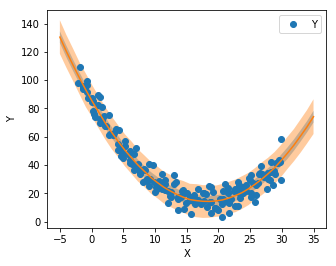

In [188]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

y_new = fit.extract()['y_new'].T
ax.plot(df['X'].values, df['Y'], 'o', )
ax.plot(X_new, y_new.mean(axis=1))
ax.fill_between(X_new, np.percentile(y_new, 25.0, axis=1), np.percentile(y_new, 75.0, axis=1), alpha=0.4)
ax.fill_between(X_new, np.percentile(y_new, 2.5, axis=1), np.percentile(y_new, 97.5, axis=1), alpha=0.4)
# ax_.xlim(40, 200)
# ax_.ylim(0.0, 0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

In [179]:
df = pd.read_csv('./input/data-conc.txt')
df.head()

,Time,Y
0,1,2.4
1,2,5.0
2,4,7.5
3,8,11.9
4,12,12.5


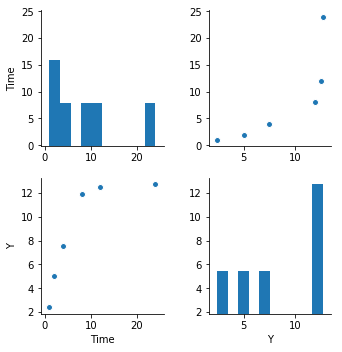

In [180]:
sns.pairplot(df)

In [162]:
model = pystan.StanModel('model/model7-4.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_59ea64034c01e8b19ed37b566fcfaa81 NOW.


In [182]:
X_new = np.linspace(0,  30, 30)
N_new = X_new.shape[0]
stan_data = {
    'Time': df['Time'].values,
    'Y': df['Y'].values,
    'T': df.shape[0],
    'T_new': N_new,
    'Time_new': X_new,
}
fit = model.sampling(data=stan_data, seed=1234)
fit

Inference for Stan model: anon_model_59ea64034c01e8b19ed37b566fcfaa81.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a          13.12    0.03   0.86  11.53  12.73  13.09  13.48  14.85    652   1.01
b           0.25  2.4e-3   0.07   0.17   0.22   0.24   0.26   0.37    896    1.0
s_Y         0.85    0.02   0.58   0.35   0.53   0.69   0.96   2.47    622    1.0
y_new[0]  7.1e-3    0.02   0.97  -1.99  -0.46 7.1e-3   0.46   1.93   4000    1.0
y_new[1]    2.89    0.02   1.11   0.86   2.34   2.88   3.39   5.14   2930    1.0
y_new[2]    5.16    0.02   1.16   2.99   4.58   5.13   5.63   7.49   2623    1.0
y_new[3]    6.89    0.02   1.24   4.73   6.31   6.86   7.42   9.34   2726    1.0
y_new[4]    8.21    0.02   1.25   5.95   7.65   8.19   8.76  10.53   2862    1.0
y_new[5]    9.29    0.02   1.16    7.1   8.75   9.26    9.8  11.66   3704    1.0
y

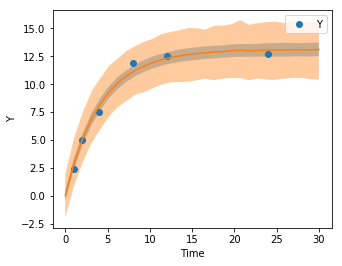

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

y_new = fit.extract()['y_new'].T
ax.plot(df['Time'].values, df['Y'], 'o', )
ax.plot(X_new, y_new.mean(axis=1))
ax.fill_between(X_new, np.percentile(y_new, 25.0, axis=1), np.percentile(y_new, 75.0, axis=1), alpha=0.4)
ax.fill_between(X_new, np.percentile(y_new, 2.5, axis=1), np.percentile(y_new, 97.5, axis=1), alpha=0.4)
# ax_.xlim(40, 200)
# ax_.ylim(0.0, 0.6)
ax.set_xlabel('Time')
ax.set_ylabel('Y')
ax.legend()

### 交絡

In [189]:
df = pd.read_csv('input/data-50m.txt')
df.head()

,Y,Weight,Age
0,2.46,16.6,7
1,3.02,21.4,7
2,2.91,24.0,7
3,3.05,13.0,7
4,2.60,21.9,7


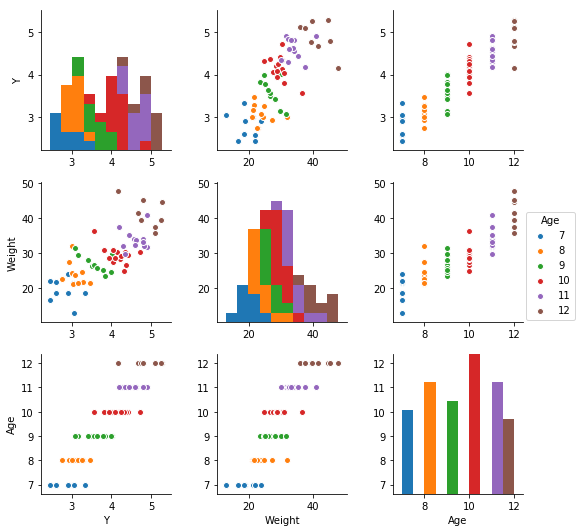

In [191]:
sns.pairplot(df, hue='Age')

In [192]:
model = pystan.StanModel('model/model7-5.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a546db8af07bf770a4a0ac79b7ac12e4 NOW.


In [193]:
X_new = np.linspace(0,  30, 30)
N_new = X_new.shape[0]
stan_data = {
    'Age': df['Age'].values,
    'Weight': df['Weight'].values,
    'Y': df['Y'].values,
    'N': df.shape[0],
}
fit = model.sampling(data=stan_data, seed=1234)
fit

Inference for Stan model: anon_model_a546db8af07bf770a4a0ac79b7ac12e4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c[0]       -8.6    0.06   2.51 -13.47 -10.27  -8.58  -6.98  -3.57   2080    1.0
c[1]       3.95  5.7e-3   0.26   3.44   3.78   3.96   4.13   4.46   2099    1.0
b[0]      -0.71  4.8e-3   0.22  -1.13  -0.86  -0.71  -0.57  -0.27   2088    1.0
b[1]       0.59  1.1e-3   0.05   0.49   0.56   0.59   0.62   0.68   1690    1.0
b[2]      -0.03  2.3e-4   0.01  -0.06  -0.04  -0.03  -0.03  -0.01   2075    1.0
s_W         3.3  5.5e-3   0.31   2.77   3.08   3.27   3.49   3.97   3140    1.0
s_Y        0.27  4.8e-4   0.02   0.23   0.25   0.27   0.29   0.32   2660    1.0
mu_W[0]   19.08    0.02   0.78  17.57  18.56  19.09  19.59   20.7   2110    1.0
mu_W[1]   19.08    0.02   0.78  17.57  18.56  19.09  19.59   20.7   2110    1.0
mu_W[2]   1

### ノイズ

In [195]:
df = pd.read_csv('../chap04/input/data-salary.txt')
df.head()

,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


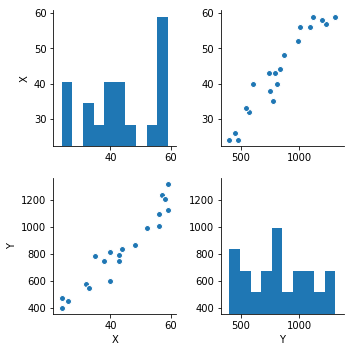

In [196]:
sns.pairplot(df)

In [197]:
model = pystan.StanModel('model/model7-6.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5df62094f24897ded1e4447cb84d18ff NOW.


In [198]:
stan_data = {
    'X': df['X'].values,
    'Y': df['Y'].values,
    'N': df.shape[0],
}
fit = model.sampling(data=stan_data, seed=1234)
fit

Inference for Stan model: anon_model_5df62094f24897ded1e4447cb84d18ff.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a          -123.5    2.06  74.63 -274.6 -171.8 -122.7 -75.13   22.6   1314    1.0
b           21.99    0.05   1.66  18.72  20.89  21.97  23.06  25.38   1298    1.0
x_true[0]   25.51    0.05   2.04   21.3  24.22   25.6  26.86  29.41   1620    1.0
x_true[1]    24.0    0.03   1.96  19.94  22.76  24.03  25.29  27.71   4000    1.0
x_true[2]   26.18    0.03    1.9  22.41  24.89  26.22  27.49  29.72   4000    1.0
x_true[3]   31.89    0.03   1.85  28.25  30.69  31.91  33.15  35.53   4000    1.0
x_true[4]   31.81    0.03   1.92  28.31  30.47  31.76  33.02  35.72   4000    1.0
x_true[5]   37.92    0.06   2.11  33.61  36.55  38.01  39.43  41.63   1264    1.0
x_true[6]   38.81    0.03   1.89  34.98  37.57  38.88   40.1  42.33   400

### 打ち切り

In [199]:
df = pd.read_csv('input/data-protein.txt')
df.head()

,Y
0,<25
1,32.3
2,<25
3,28.3
4,30.8


In [205]:
model = pystan.StanModel('model/model7-7.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_94c61b081d3c73871be8a3dd17a055f9 NOW.


In [222]:
Y_obs = df[df['Y'].str.find('<') == -1]['Y'].astype(float).values
L = df[df['Y'].str.find('<') != -1]['Y'].apply(lambda x: x.replace('<', '')).astype(float).values
stan_data = {
    'Y_obs': Y_obs,
    'N_obs': Y_obs.shape[0],
    'L': L[0],
    'N_cens': L.shape[0],
}
fit = model.sampling(data=stan_data, seed=1234)
fit

Inference for Stan model: anon_model_94c61b081d3c73871be8a3dd17a055f9.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu    25.53    0.48  10.82   3.89   23.1  27.17  29.93  39.33    518   1.01
s_Y   15.42    0.79  18.26   3.92   6.91  10.27  17.04  59.52    538    1.0
lp__ -10.39    0.07   1.52 -14.52 -11.06   -9.9  -9.28  -8.84    472    1.0

Samples were drawn using NUTS at Sat Oct 28 21:32:56 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

### 外れ値

In [223]:
df = pd.read_csv('./input/data-outlier.txt')
df.head()

,X,Y
0,1,3.4
1,2,8.2
2,3,40.0
3,4,17.6
4,5,20.3


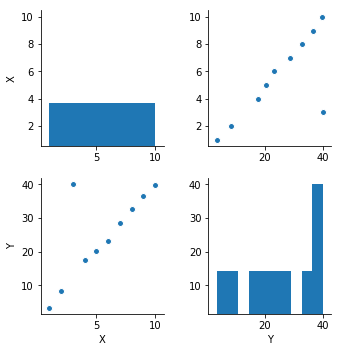

In [224]:
sns.pairplot(df)

In [239]:
model_norm = pystan.StanModel('model/model7-8.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9065bc71f676792d02d3774fed55f000 NOW.


In [250]:
X_new = np.linspace(0, 10, 10)
N_new = X_new.shape[0]
stan_data = {
    'X': df['X'].values,
    'Y': df['Y'].values,
    'N': df.shape[0],
    'X_new': X_new,
    'N_new': N_new,
}
fit = model_norm.sampling(data=stan_data, seed=1234)
fit

Inference for Stan model: anon_model_9065bc71f676792d02d3774fed55f000.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a          7.57    0.21   7.84  -8.73   3.21   7.69  12.23  23.32   1393    1.0
b          3.17    0.03   1.28   0.57   2.39   3.18   3.92   5.86   1408    1.0
sigma     10.89    0.12   3.56   6.25   8.47  10.17  12.44  19.85    958    1.0
y_new[0]    7.8     0.3  14.12 -19.95  -0.76   8.02  16.16  35.86   2240    1.0
y_new[1]  11.48    0.25  13.27 -14.54    3.5  11.31  19.68  37.46   2828    1.0
y_new[2]  14.62    0.23  12.59  -10.5   6.91   14.6  22.24  39.45   2878    1.0
y_new[3]  18.33     0.2  12.11  -6.37  11.28  18.36  25.87  41.51   3526    1.0
y_new[4]  21.67    0.19  11.99  -2.71  14.76  21.73  28.84  45.67   3940    1.0
y_new[5]  25.32    0.19  12.08   1.52   18.0  25.36  32.71  48.02   4000    1.0
y_new[6]  2

In [247]:
model_cauchy = pystan.StanModel('model/model7-9.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5019184b7ed21569e2a1b862eac002cc NOW.


In [251]:
X_new = np.linspace(0, 10, 10)
N_new = X_new.shape[0]
stan_data = {
    'X': df['X'].values,
    'Y': df['Y'].values,
    'N': df.shape[0],
    'X_new': X_new,
    'N_new': N_new,
}
fit_cauchy = model_cauchy.sampling(data=stan_data, seed=1234)
fit_cauchy

Inference for Stan model: anon_model_5019184b7ed21569e2a1b862eac002cc.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a          0.07    0.03   0.95  -1.56  -0.48  -0.02   0.48    2.3    974    1.0
b          4.04  4.5e-3   0.14   3.73   3.97   4.05   4.12   4.27    961    1.0
sigma      0.81    0.02   0.48   0.21   0.49    0.7    1.0   2.08    840    1.0
y_new[0]   7.09    8.94 565.72 -12.64  -0.96 3.0e-3   1.05  12.05   4000    1.0
y_new[1]   5.11    0.41  25.55  -6.48   3.64   4.51   5.46  16.46   3971    1.0
y_new[2]   9.62    0.38   23.8  -1.41   8.17   9.01   9.91  20.95   3865    1.0
y_new[3]  14.41    0.86   54.0   2.92  12.73  13.51  14.37  25.51   3985    1.0
y_new[4]  17.91     1.0  62.97   7.25  17.23   18.0  18.78  26.98   4000    1.0
y_new[5]  23.11    1.07  67.44   9.09  21.73   22.5  23.23  31.73   4000    1.0
y_new[6]  2

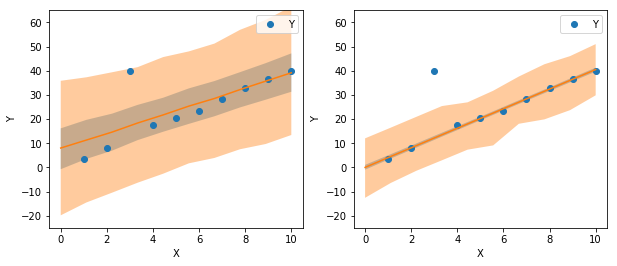

In [253]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

y_new = fit.extract()['y_new'].T
ax[0].plot(df['X'].values, df['Y'], 'o', )
ax[0].plot(X_new, np.median(y_new, axis=1))
ax[0].fill_between(X_new, np.percentile(y_new, 25.0, axis=1), np.percentile(y_new, 75.0, axis=1), alpha=0.4)
ax[0].fill_between(X_new, np.percentile(y_new, 2.5, axis=1), np.percentile(y_new, 97.5, axis=1), alpha=0.4)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_ylim(-25, 65)
ax[0].legend()

y_new = fit_cauchy.extract()['y_new'].T
ax[1].plot(df['X'].values, df['Y'], 'o', )
ax[1].plot(X_new, np.median(y_new, axis=1))
ax[1].fill_between(X_new, np.percentile(y_new, 25.0, axis=1), np.percentile(y_new, 75.0, axis=1), alpha=0.4)
ax[1].fill_between(X_new, np.percentile(y_new, 2.5, axis=1), np.percentile(y_new, 97.5, axis=1), alpha=0.4)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_ylim(-25, 65)
ax[1].legend()